In [122]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [123]:
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/agaricus-lepiota.data")

In [124]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [125]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [126]:
df.columns = ["Seta","cap-shape","cap-surface","cap-color", "bruises", "odor","gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]

In [127]:
df.head()

,Seta,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [128]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    class_labelEncoding = LabelEncoder()
    df[i] = class_labelEncoding.fit_transform(df[i].values)
    

Feature ranking:
1. feature 7 (0.135980)
2. feature 4 (0.124344)
3. feature 3 (0.106308)
4. feature 18 (0.077928)
5. feature 6 (0.065102)
6. feature 10 (0.064822)
7. feature 11 (0.057077)
8. feature 19 (0.056985)
9. feature 8 (0.051184)
10. feature 9 (0.047745)
11. feature 20 (0.043698)
12. feature 12 (0.043583)
13. feature 21 (0.031458)
14. feature 17 (0.019216)
15. feature 1 (0.017471)
16. feature 13 (0.016725)
17. feature 14 (0.015247)
18. feature 2 (0.010722)
19. feature 5 (0.006217)
20. feature 16 (0.004353)
21. feature 0 (0.003833)
22. feature 15 (0.000000)


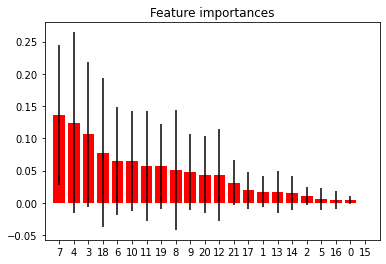

In [129]:
#Feature Selection
X = np.asarray(df.iloc[:,1:])
y = np.asarray(df.iloc[:,0]) 

from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [130]:
df.columns

Index(['Seta', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [98]:
#Me quedo con las columnas que tienen mas peso
cols=['gill-spacing','bruises','cap-color','ring-number','gill-attachment','stalk-shape','stalk-root','ring-type','gill-size',
'gill-size','gill-color','spore-print-color','stalk-surface-above-ring','Seta']
df2=df[cols]

In [131]:
df2=df.drop(df.columns[[9,20,12,21,17,1,13,14,2,5,16,15]],axis=1)

In [132]:
df2.head()

,Seta,cap-color,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-root,ring-number,ring-type,habitat
0,0,9,1,1,0,0,0,2,1,4,1
1,0,8,1,1,0,0,0,2,1,4,3
2,1,8,1,1,0,1,0,3,1,4,5
3,0,3,0,1,1,0,1,3,1,0,1
4,0,9,1,1,0,0,0,2,1,4,1


In [99]:
#Con las columnas que tengan mas peso
X2 = np.asarray(df2.iloc[:,1:])
y2 = np.asarray(df2.iloc[:,0])

In [133]:
#Con todas las columnas
X = np.asarray(df2.iloc[:,1:])
y = np.asarray(df2.iloc[:,0]) 

### Hold Out

In [134]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [135]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_trainset, y_trainset)
yhat = clf.predict(X_testset)
print("F1-score: ", f1_score(y_testset,yhat, average="macro"))

F1-score:  1.0


In [136]:
plt.figure(figsize=(100, 200))
tree.plot_tree(clf.fit(X, y)) 
plt.show()

### Cross validation

In [142]:
clf = tree.DecisionTreeClassifier(criterion="gini") 
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(accuracy_score))
print(scores)
print("*****"*10)
print("Accuracy: ", scores.mean())

[0.84378844 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
**************************************************
Accuracy:  0.984378843788438


In [137]:
#Para sacr el report
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
yhat=[]
ytest=[]
xtrain=[]
ytrain=[]
for train_index, test_index in kf.split(X2):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = tree.DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    yhat1 = clf.predict(X_test)
    yhat.extend(yhat1)
    ytest.extend(y_test)
    xtrain.extend(X_train)
    ytrain.extend(y_train)

In [138]:
print(classification_report(yhat, ytest,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      4208
           1      1.000     1.000     1.000      3915

    accuracy                          1.000      8123
   macro avg      1.000     1.000     1.000      8123
weighted avg      1.000     1.000     1.000      8123



In [105]:
plt.figure(figsize=(100, 200))
tree.plot_tree(clf.fit(X2, y2)) 
plt.show()

In [139]:
clf.get_n_leaves()

17